# Libraries

In [1]:
!pip install -q mlxtend

In [2]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder


# Load Dataset

In [3]:
def load_dataset(csv_file):
    return pd.read_csv(csv_file)

# Load the dataset using the load_dataset function
csv_file_path = 'C:\\Users\\Great Woman\\Downloads\\Market Basket Analysis - Groceries_dataset.csv'
dataset = load_dataset(csv_file_path)

# Display the first few rows of the dataset as if viewing an Excel sheet
print("First 20 rows of the dataset:")
display(dataset.head(20))

# Print information about the dataset
print("\nInformation about the dataset:")
display(dataset.info())

# Print statistical summary of the dataset
print("\nStatistical summary of the dataset:")
display(dataset.describe())


First 20 rows of the dataset:


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
5,4941,14-02-2015,rolls/buns
6,4501,08-05-2015,other vegetables
7,3803,23-12-2015,pot plants
8,2762,20-03-2015,whole milk
9,4119,12-02-2015,tropical fruit



Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


None


Statistical summary of the dataset:


,Member_number
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


# Clean Dataset

In [4]:
def clean_dataset(data):
    # Check for duplicate rows
    if data.duplicated().any():
        print("Duplicate rows found and removed.")
        data.drop_duplicates(inplace=True)
    else:
        print("No duplicate rows found.")

    # Check for missing values
    if data.isnull().any().any():
        print("Rows with missing values found and removed.")
        data.dropna(inplace=True)
    else:
        print("No missing values found.")

    return data

cleaned_dataset = clean_dataset(dataset)

# Convert 'Date' to datetime if present
if 'Date' in cleaned_dataset.columns:
    cleaned_dataset['Date'] = pd.to_datetime(cleaned_dataset['Date'], dayfirst=True, format='%d-%m-%Y')

# Display the first few rows of the cleaned dataset
print("First few rows of the cleaned dataset:")
display(cleaned_dataset.head(20))

# Print information about the cleaned dataset
print("\nInformation about the cleaned dataset:")
display(cleaned_dataset.info())

# Print statistical summary of the cleaned dataset
print("\nStatistical summary of the cleaned dataset:")
display(cleaned_dataset.describe())


Duplicate rows found and removed.
No missing values found.
First few rows of the cleaned dataset:


,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-01-05,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-02-01,whole milk
5,4941,2015-02-14,rolls/buns
6,4501,2015-05-08,other vegetables
7,3803,2015-12-23,pot plants
8,2762,2015-03-20,whole milk
9,4119,2015-02-12,tropical fruit



Information about the cleaned dataset:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 38006 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38006 non-null  int64         
 1   Date             38006 non-null  datetime64[ns]
 2   itemDescription  38006 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.2+ MB


None


Statistical summary of the cleaned dataset:


,Member_number
count,38006.000000
mean,3003.361390
std,1153.659151
min,1000.000000
25%,2001.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


In [5]:
print("Column names:", cleaned_dataset.columns)


Column names: Index(['Member_number', 'Date', 'itemDescription'], dtype='object')


# cleaned dataset to extract month and year from Date column

In [6]:
def clean_dataset(data):
    # Check for duplicate rows
    if data.duplicated().any():
        print("Duplicate rows found and removed.")
        data.drop_duplicates(inplace=True)
    else:
        print("No duplicate rows found.")

    # Check for missing values
    if data.isnull().any().any():
        print("Rows with missing values found and removed.")
        data.dropna(inplace=True)
    else:
        print("No missing values found.")

    return data

cleaned_dataset = clean_dataset(dataset)

# Convert 'Date' to datetime if present
if 'Date' in cleaned_dataset.columns:
    cleaned_dataset['Date'] = pd.to_datetime(cleaned_dataset['Date'], dayfirst=True, format='%d-%m-%Y')

    # Extract year and month
    cleaned_dataset['Year'] = cleaned_dataset['Date'].dt.year
    cleaned_dataset['Month'] = cleaned_dataset['Date'].dt.month

# Display the first few rows of the cleaned dataset
print("First few rows of the cleaned dataset:")
display(cleaned_dataset.head(20))

# Print information about the cleaned dataset
print("\nInformation about the cleaned dataset:")
display(cleaned_dataset.info())

# Print statistical summary of the cleaned dataset
print("\nStatistical summary of the cleaned dataset:")
display(cleaned_dataset.describe())


No duplicate rows found.
No missing values found.
First few rows of the cleaned dataset:


,Member_number,Date,itemDescription,Year,Month
0,1808,2015-07-21,tropical fruit,2015,7
1,2552,2015-01-05,whole milk,2015,1
2,2300,2015-09-19,pip fruit,2015,9
3,1187,2015-12-12,other vegetables,2015,12
4,3037,2015-02-01,whole milk,2015,2
5,4941,2015-02-14,rolls/buns,2015,2
6,4501,2015-05-08,other vegetables,2015,5
7,3803,2015-12-23,pot plants,2015,12
8,2762,2015-03-20,whole milk,2015,3
9,4119,2015-02-12,tropical fruit,2015,2



Information about the cleaned dataset:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 38006 entries, 0 to 38764
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38006 non-null  int64         
 1   Date             38006 non-null  datetime64[ns]
 2   itemDescription  38006 non-null  object        
 3   Year             38006 non-null  int64         
 4   Month            38006 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.7+ MB


None


Statistical summary of the cleaned dataset:


,Member_number,Year,Month
count,38006.000000,38006.000000,38006.000000
mean,3003.361390,2014.525733,6.493922
std,1153.659151,0.499344,3.417685
min,1000.000000,2014.000000,1.000000
25%,2001.000000,2014.000000,4.000000
50%,3005.000000,2015.000000,7.000000
75%,4007.000000,2015.000000,9.000000
max,5000.000000,2015.000000,12.000000


# Data Exploration & Visualization

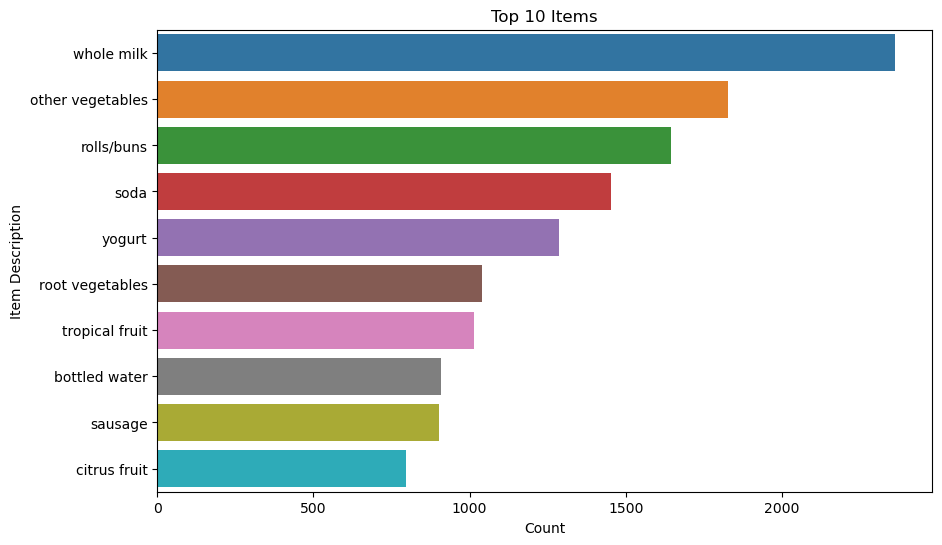

In [7]:
# Get the top 10 items based on counts
top_items = cleaned_dataset['itemDescription'].value_counts().head(10)

# Example: Visualizing the distribution of top 10 items (horizontal bar plot)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_items.values, y=top_items.index, orient='h')  # Use orient='h' for horizontal bar plot
plt.title('Top 10 Items')
plt.xlabel('Count')
plt.ylabel('Item Description')
plt.show()


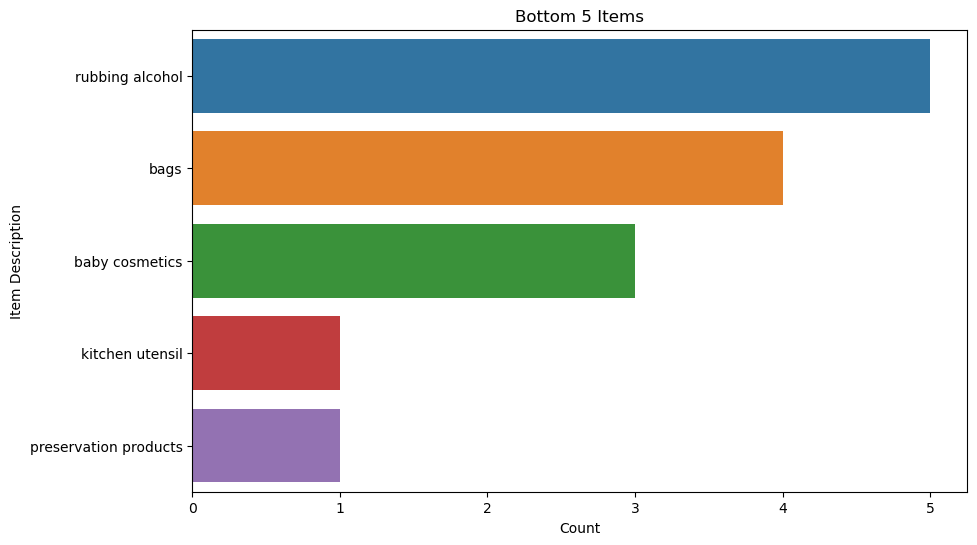

In [8]:
# Get the bottom 5 items based on counts
bottom_items = cleaned_dataset['itemDescription'].value_counts().tail(5)

# Example: Visualizing the distribution of bottom 5 items (horizontal bar plot)
plt.figure(figsize=(10, 6))
sns.barplot(x=bottom_items.values, y=bottom_items.index, orient='h')  # Use orient='h' for horizontal bar plot
plt.title('Bottom 5 Items')
plt.xlabel('Count')
plt.ylabel('Item Description')
plt.show()


# Monthly item counts

Index type: DatetimeIndex(['2015-07-21', '2015-01-05', '2015-09-19', '2015-12-12',
               '2015-02-01', '2015-02-14', '2015-05-08', '2015-12-23',
               '2015-03-20', '2015-02-12',
               ...
               '2014-09-26', '2014-10-29', '2014-12-07', '2014-06-18',
               '2014-05-06', '2014-10-08', '2014-02-23', '2014-04-16',
               '2014-12-03', '2014-12-26'],
              dtype='datetime64[ns]', name='Date', length=38006, freq=None)


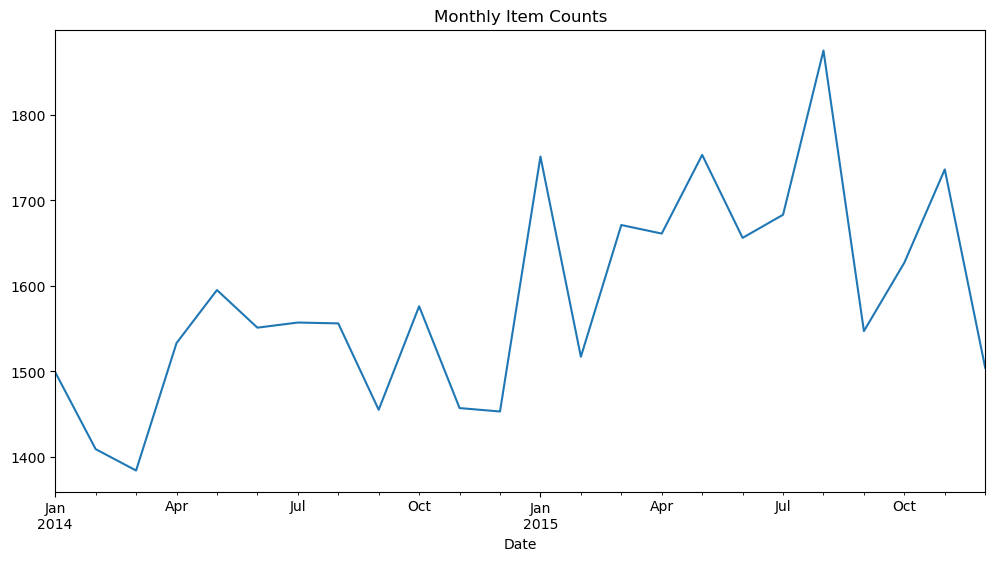

In [9]:
# cleaned_dataset' is the DataFrame
cleaned_dataset['Date'] = pd.to_datetime(cleaned_dataset['Date'], dayfirst=True, format='%d-%m-%Y')

# Set 'Date' as the index
cleaned_dataset.set_index('Date', inplace=True)

# Verify that 'Date' is now a DatetimeIndex
print("Index type:", cleaned_dataset.index)

# Example: Time series plot of item counts
plt.figure(figsize=(12, 6))
cleaned_dataset.resample('M').size().plot(legend=False)
plt.title('Monthly Item Counts')
plt.show()


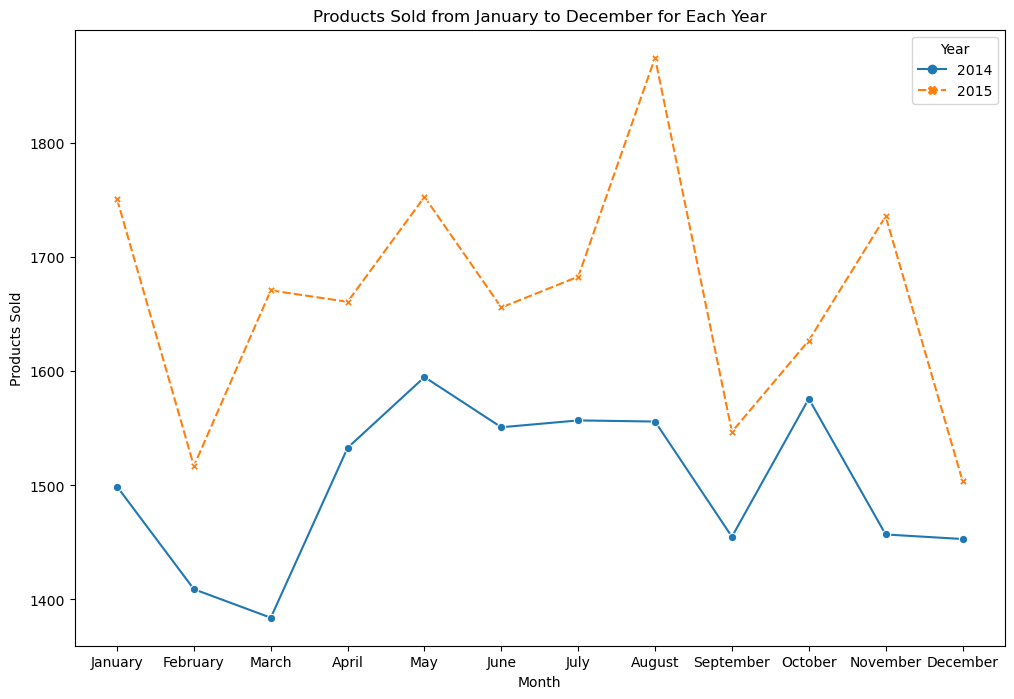

In [10]:
# Extract year and month from the index
cleaned_dataset['Year'] = cleaned_dataset.index.year
cleaned_dataset['Month'] = cleaned_dataset.index.month

# Group data by year and month, count the number of products sold
products_sold_by_month_year = cleaned_dataset.groupby(['Year', 'Month']).size().reset_index(name='Products Sold')

# Pivot the data for better visualization
products_sold_pivot = products_sold_by_month_year.pivot(index='Month', columns='Year', values='Products Sold')

# Example: Visualizing products sold from January to December for each year
plt.figure(figsize=(12, 8))
sns.lineplot(data=products_sold_pivot, markers=True)
plt.title('Products Sold from January to December for Each Year')
plt.xlabel('Month')
plt.ylabel('Products Sold')
plt.xticks(range(1, 13), ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.legend(title='Year')
plt.show()


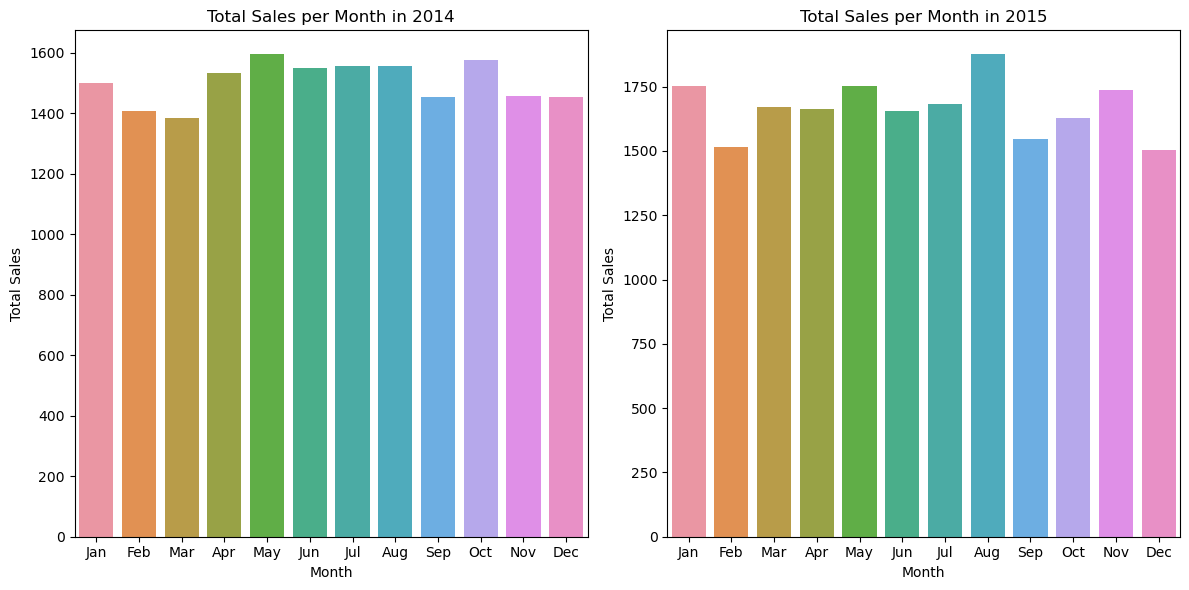

In [11]:
# Create a mapping of month numbers to month names
month_mapping = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

# Replace numerical month values with month names
cleaned_dataset['Month'] = cleaned_dataset['Month'].map(month_mapping)

# Filter data for the years 2014 and 2015
data_2014_2015 = cleaned_dataset[(cleaned_dataset['Year'] == 2014) | (cleaned_dataset['Year'] == 2015)]

# Group data by 'Year' and 'Month' and sum up the sales
monthly_sales = data_2014_2015.groupby(['Year', 'Month']).size().reset_index(name='Total Sales')

# Create separate bar charts for each year
plt.figure(figsize=(12, 6))

# Bar chart for 2014
plt.subplot(1, 2, 1)
sns.barplot(x='Month', y='Total Sales', data=monthly_sales[monthly_sales['Year'] == 2014], order=month_mapping.values())
plt.title('Total Sales per Month in 2014')
plt.xlabel('Month')
plt.ylabel('Total Sales')

# Bar chart for 2015
plt.subplot(1, 2, 2)
sns.barplot(x='Month', y='Total Sales', data=monthly_sales[monthly_sales['Year'] == 2015], order=month_mapping.values())
plt.title('Total Sales per Month in 2015')
plt.xlabel('Month')
plt.ylabel('Total Sales')

plt.tight_layout()
plt.show()


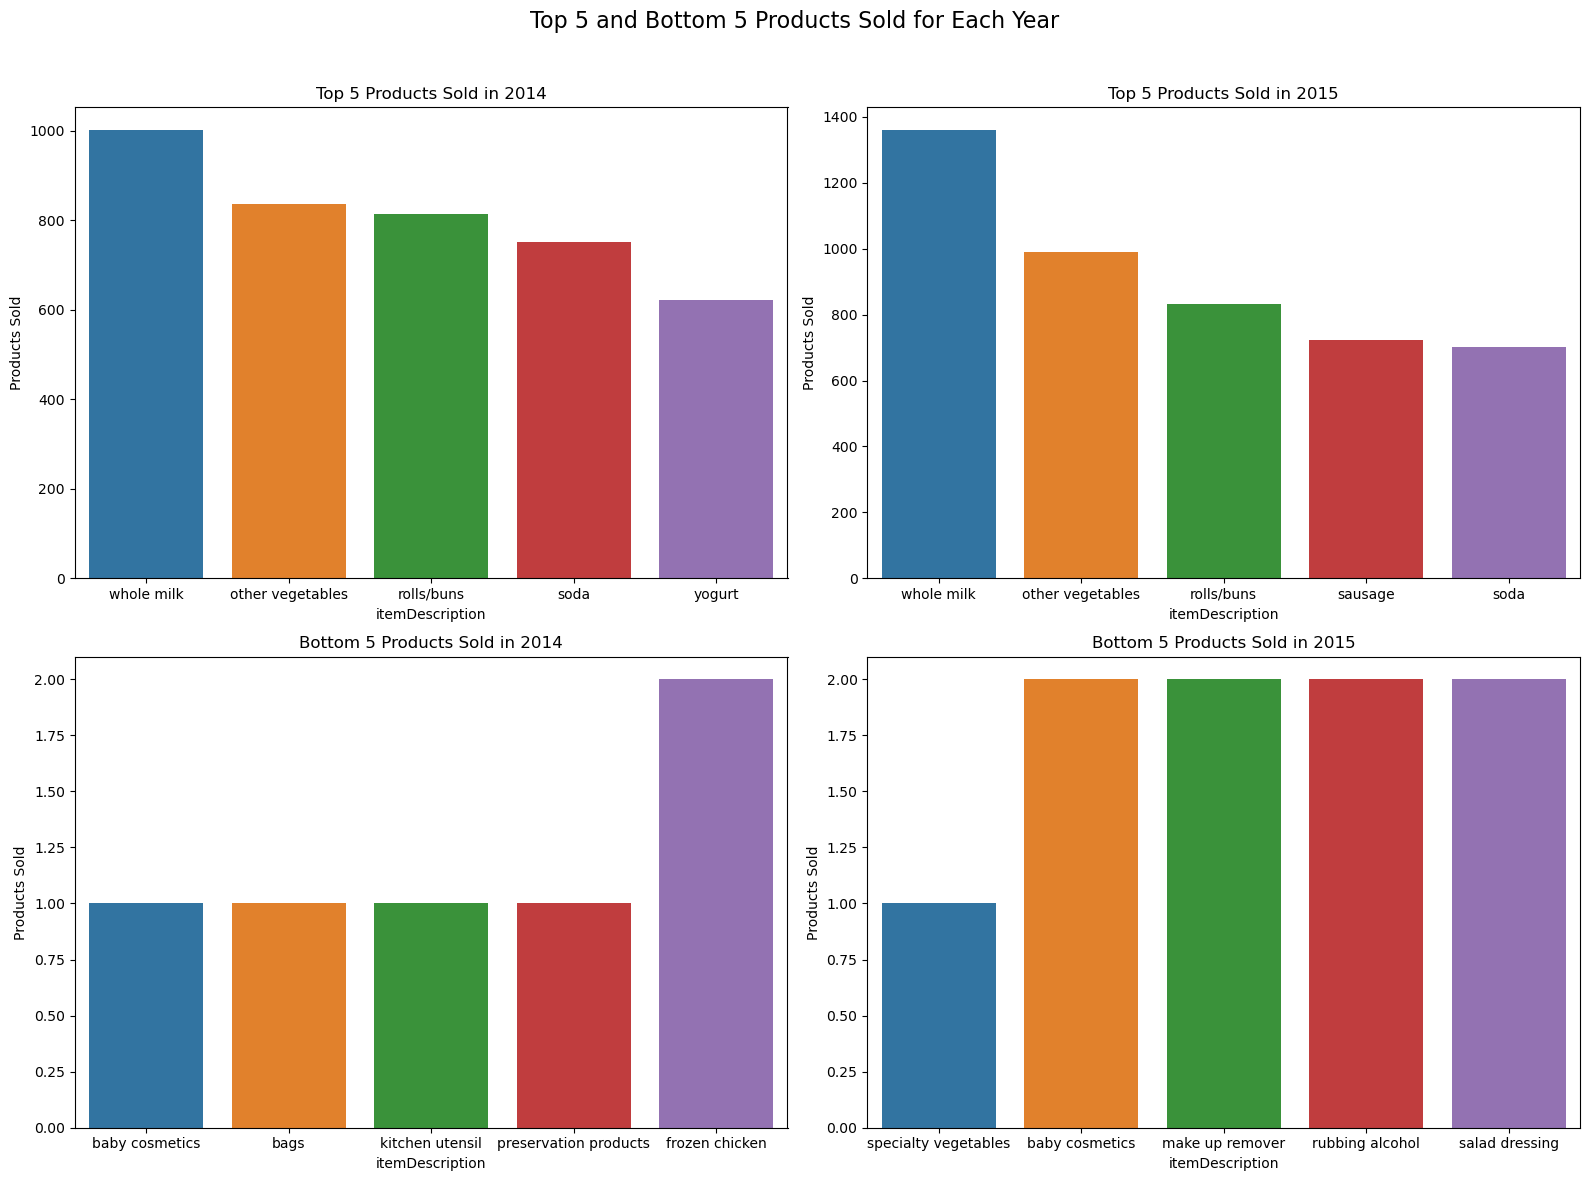

In [12]:
# Extract year and month from the index
cleaned_dataset['Year'] = cleaned_dataset.index.year

# Group data by year and item, count the number of products sold
products_by_year = cleaned_dataset.groupby(['Year', 'itemDescription']).size().reset_index(name='Products Sold')

# Find the top 5 and bottom 5 products for each year
top_products_by_year = products_by_year.groupby('Year').apply(lambda x: x.nlargest(5, 'Products Sold')).reset_index(drop=True)
bottom_products_by_year = products_by_year.groupby('Year').apply(lambda x: x.nsmallest(5, 'Products Sold')).reset_index(drop=True)

# Create subplots for each category
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Top 5 and Bottom 5 Products Sold for Each Year', fontsize=16)

# Plot Top 5 for 2014
sns.barplot(x='itemDescription', y='Products Sold', data=top_products_by_year[top_products_by_year['Year'] == 2014], ax=axes[0, 0])
axes[0, 0].set_title('Top 5 Products Sold in 2014')

# Plot Top 5 for 2015
sns.barplot(x='itemDescription', y='Products Sold', data=top_products_by_year[top_products_by_year['Year'] == 2015], ax=axes[0, 1])
axes[0, 1].set_title('Top 5 Products Sold in 2015')

# Plot Bottom 5 for 2014
sns.barplot(x='itemDescription', y='Products Sold', data=bottom_products_by_year[bottom_products_by_year['Year'] == 2014], ax=axes[1, 0])
axes[1, 0].set_title('Bottom 5 Products Sold in 2014')

# Plot Bottom 5 for 2015
sns.barplot(x='itemDescription', y='Products Sold', data=bottom_products_by_year[bottom_products_by_year['Year'] == 2015], ax=axes[1, 1])
axes[1, 1].set_title('Bottom 5 Products Sold in 2015')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# Histograms

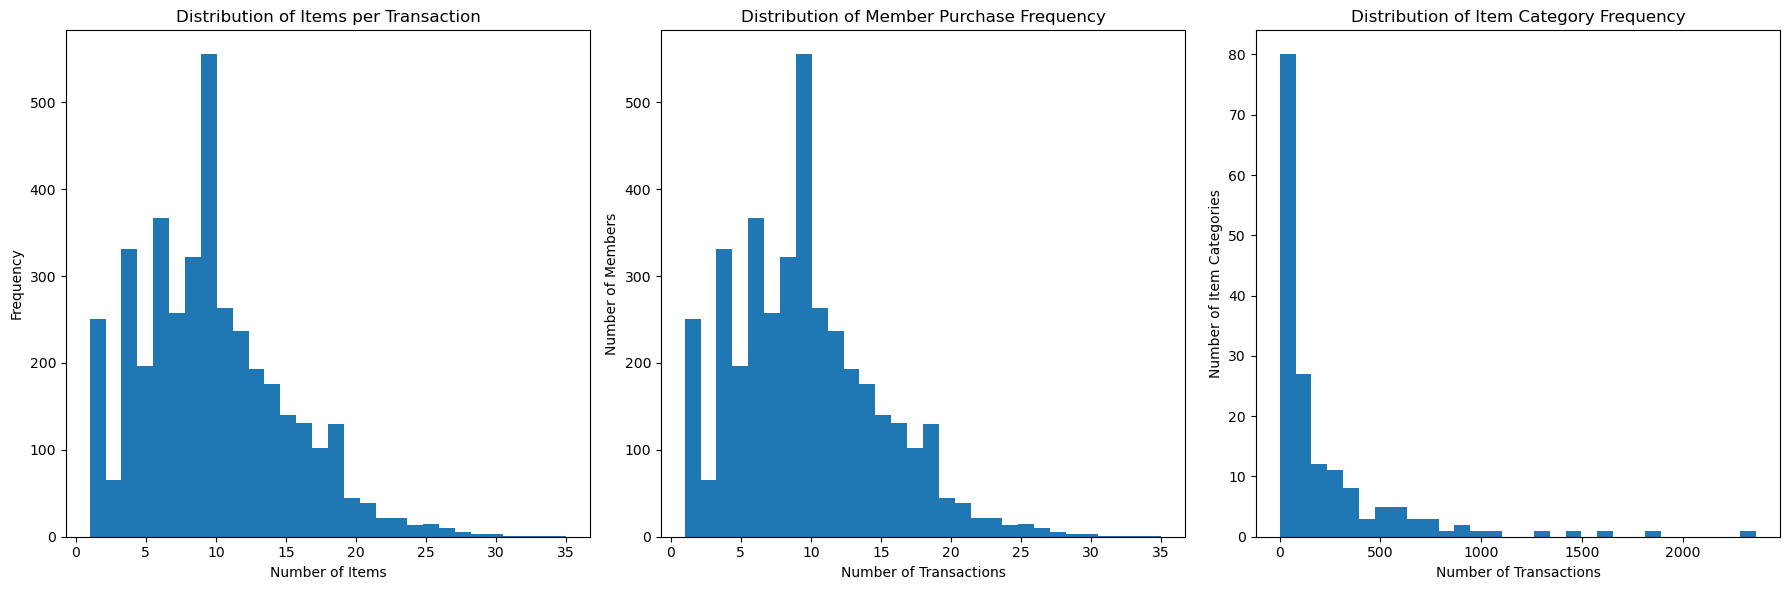

In [13]:
def plot_histogram(data, title, xlabel, ylabel, bins=30):
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=bins)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()


# Create subplots for histograms
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Subplot 1: Distribution of Items per Transaction
axes[0].hist(cleaned_dataset.groupby('Member_number').size(), bins=30)
axes[0].set_title('Distribution of Items per Transaction')
axes[0].set_xlabel('Number of Items')
axes[0].set_ylabel('Frequency')

# Subplot 2: Distribution of Member Purchase Frequency
axes[1].hist(cleaned_dataset['Member_number'].value_counts(), bins=30)
axes[1].set_title('Distribution of Member Purchase Frequency')
axes[1].set_xlabel('Number of Transactions')
axes[1].set_ylabel('Number of Members')

# Subplot 3: Distribution of Item Category Frequency
axes[2].hist(cleaned_dataset['itemDescription'].value_counts(), bins=30)
axes[2].set_title('Distribution of Item Category Frequency')
axes[2].set_xlabel('Number of Transactions')
axes[2].set_ylabel('Number of Item Categories')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


# Heatmap

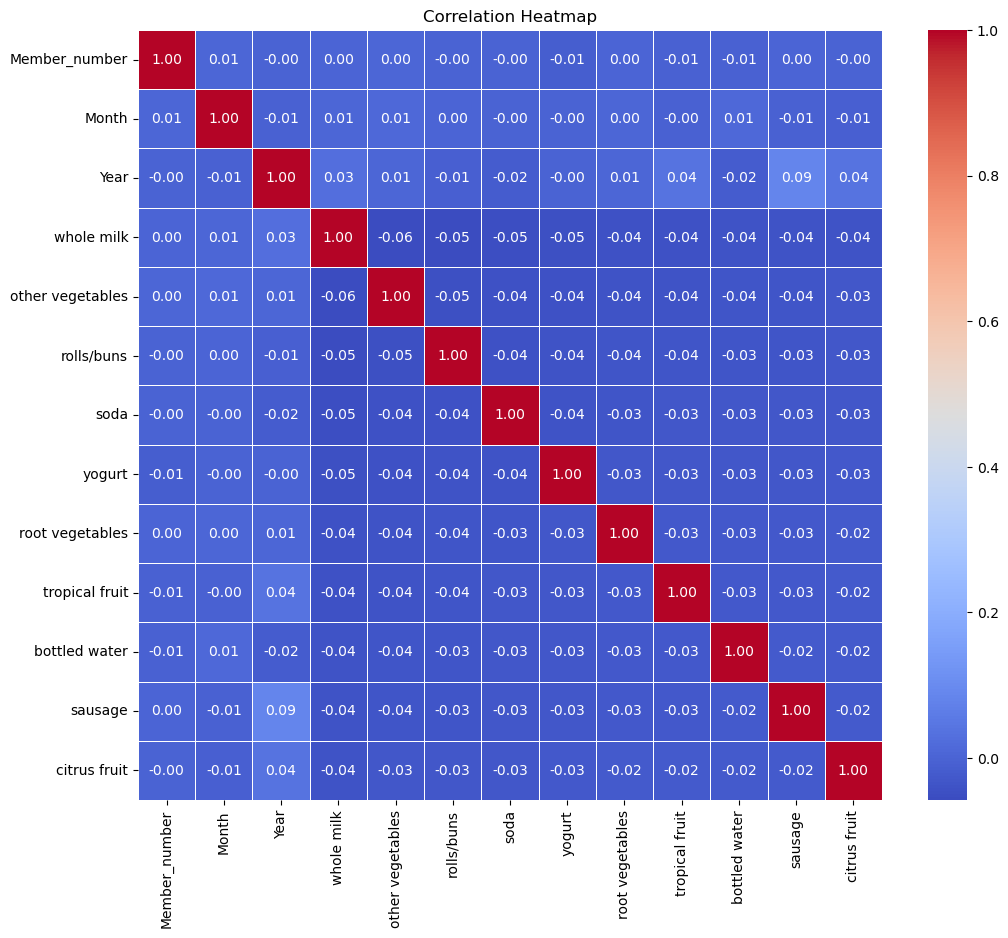

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# cleaned_dataset' has 'Month', 'Year', 'Member_number', and 'itemDescription' columns

# Extract 'Month' and 'Year' from the index
cleaned_dataset['Month'] = cleaned_dataset.index.month
cleaned_dataset['Year'] = cleaned_dataset.index.year

# Selecting relevant columns for the heatmap
heatmap_data = cleaned_dataset[['Member_number', 'Month', 'Year']]

# Choose the top N most frequent items for the heatmap (adjust N as needed)
top_items = cleaned_dataset['itemDescription'].value_counts().head(10).index
heatmap_data = pd.concat([heatmap_data, pd.get_dummies(cleaned_dataset['itemDescription'])[top_items]], axis=1)

# Calculate correlation matrix
correlation_matrix = heatmap_data.corr()

# Create a heatmap with numerical values (without annotations)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


# Market Basket Analysis

In [15]:
def market_basket_analysis(dataset, min_support=0.01, metric='lift', min_threshold=1.0):
    # Create a list of unique transactions
    transaction_list = []

    for i in dataset["Member_number"].unique():
        tlist = list(set(dataset[dataset["Member_number"]==i]['itemDescription']))
        if len(tlist) > 0:
            transaction_list.append(tlist)

    # Use TransactionEncoder to transform the transaction list
    encoder = TransactionEncoder()
    encoder_ = encoder.fit(transaction_list).transform(transaction_list)
    new_df = pd.DataFrame(encoder_, columns=encoder.columns_)

    # Apply Apriori algorithm
    frequent_itemsets = apriori(new_df, min_support=min_support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric=metric, min_threshold=min_threshold)

    # Sort the rules by confidence in descending order
    sorted_rules = rules.sort_values('confidence', ascending=False)

    # Display the results
    print("Frequent Itemsets:")
    display(frequent_itemsets.head(10))

    print("\nAssociation Rules:")
    display(sorted_rules.head(10))

# Example usage:
market_basket_analysis(cleaned_dataset, min_support=0.01, metric='lift', min_threshold=1.0)


Frequent Itemsets:


,support,itemsets
0,0.015393,(Instant food products)
1,0.078502,(UHT-milk)
2,0.031042,(baking powder)
3,0.119548,(beef)
4,0.079785,(berries)
5,0.062083,(beverages)
6,0.158799,(bottled beer)
7,0.213699,(bottled water)
8,0.135967,(brown bread)
9,0.126475,(butter)



Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
7021,"(domestic eggs, meat)",(whole milk),0.013084,0.458184,0.010262,0.784314,1.711789,0.004267,2.512057,0.421328
5710,"(chocolate, fruit/vegetable juice)",(whole milk),0.014366,0.458184,0.010775,0.750000,1.636898,0.004192,2.167265,0.394760
15141,"(yogurt, other vegetables, bottled water, roll...",(whole milk),0.014110,0.458184,0.010518,0.745455,1.626978,0.004053,2.128564,0.390879
11630,"(yogurt, pip fruit, bottled water)",(whole milk),0.013853,0.458184,0.010262,0.740741,1.616689,0.003914,2.089863,0.386811
11995,"(yogurt, brown bread, rolls/buns)",(whole milk),0.017445,0.458184,0.012827,0.735294,1.604802,0.004834,2.046862,0.383561
11126,"(other vegetables, bottled water, brown bread)",(whole milk),0.016675,0.458184,0.012057,0.723077,1.578138,0.004417,1.956559,0.372554
11100,"(yogurt, rolls/buns, bottled beer)",(whole milk),0.019241,0.458184,0.013853,0.720000,1.571422,0.005038,1.935058,0.370768
12808,"(yogurt, curd, soda)",(whole milk),0.015136,0.458184,0.010775,0.711864,1.553666,0.003840,1.880421,0.361838
15202,"(yogurt, other vegetables, rolls/buns, shoppin...",(whole milk),0.014110,0.458184,0.010005,0.709091,1.547613,0.003540,1.862494,0.358908
12891,"(sausage, domestic eggs, rolls/buns)",(whole milk),0.014879,0.458184,0.010518,0.706897,1.542823,0.003701,1.848550,0.357152


# Conclusion

FREQUENT ITEMS

Support Value: This tells us how often each group of items is bought together.

Top 10 Items: Here are the most frequently bought items:

Instant food products: Bought in 1.54% of transactions

UHT-milk: Bought in 7.85% of transactions

Baking powder: Bought in 3.10% of transactions

Beef: Bought in 11.95% of transactions

Berries: Bought in 7.98% of transactions

Beverages: Bought in 6.21% of transactions

Bottled beer: Bought in 15.88% of transactions

Bottled water: Bought in 21.37% of transactions

Brown bread: Bought in 13.60% of transactions

Butter: Bought in 12.65% of transactions


Association Rules:

Insights: Understand relationships between items.

Components: Each rule has what leads to a purchase (antecedents) and what's purchased (consequents).
Metrics: Key measures include:

Confidence: High values mean if you see some items, there's a good chance others are also bought.

Lift: Values above 1 suggest a positive connection between items.

Support: This indicates how common the association is.



Top 10 Rules:

Example: If someone buys (Domestic eggs, meat), there's a 78.43% chance they'll also buy (Whole milk). 


Interpretation:The lift value of 1.71 supports this connection, and it happens in 1.03% of transactions.


Support Values: Show how often certain item combinations occur.


High Confidence: If you see certain items (antecedents), there's a good chance others (consequents) are also bought.


Lift Values: Above 1 means items are positively related.


Example Rule: If a customer grabs domestic eggs and meat, there's a 78.43% chance they'll also pick up whole milk. The lift 
value supports this.
